In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from PIL import Image
import math

In [12]:
dataset_name = "flickr"
dataset_path = "../training_datasets/"+dataset_name+"_dataset/"

df = pd.read_csv("features_"+dataset_name+"_dataset_results.csv")
df.head()

,name,gender,age,ethnicity,emotion
0,69351.png,0,1,1,0
1,68729.png,0,4,3,0
2,69437.png,0,4,1,0
3,69423.png,1,4,1,3
4,69345.png,1,4,0,3


# Helper functions #

In [27]:
def showImagesGrid(images_list, title, n_cols=5):
    img_arr=[]
    for image in images_list:
        img = Image.open(dataset_path+image).convert('RGB')
        img = img.resize((300,300))
        img = np.asarray(img)
        img_arr.append(img)
    img_arr=np.array(img_arr)
    index, height, width, channels = img_arr.shape
    n_rows = math.ceil(index/n_cols)
    img_grid = (img_arr.reshape(n_rows, n_cols, height, width, channels)
              .swapaxes(1,2)
              .reshape(height*n_rows, width*n_cols, channels))
    fig = plt.figure(figsize=(20., 20.))
    plt.title(title)
    plt.imshow(img_grid)

def printPieChart(data, labels, title, save=False):
    plt.figure(figsize =(10, 7))
    plt.title(title)
    plt.pie(data, labels = labels, autopct='%1.1f%%')
    if save:
        plt.savefig(title+'.jpeg', dpi=300)
    else:
        plt.show()

def printDistribution(distribution, title, save=False):
    distribution.T.plot(kind="bar", stacked=True)
    plt.xlabel("Age")
    plt.ylabel("Total")
    plt.xticks(rotation=45)
    plt.title(title)
    if save:
        plt.savefig(title+'.jpeg', dpi=300)
    
    """
        plt.figure(figsize=(10,7))
        for index, row in distribution.iterrows():
            plt.plot(x_ticks, row, label = index)
        plt.grid()
        plt.xlabel("Age")
        plt.ylabel("Total")
        plt.ylim([1, distribution.to_numpy().max()])
        plt.title(title)
        plt.legend()
    """
    
        

# Ethnicity distribution #

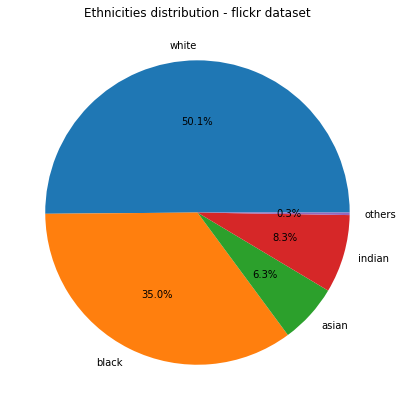

        (0-2)  (4-6)  (8-12)  (15-20)  (25-32)  (38-43)  (48-53)  (60-100)
white     109    164     201      104      670      157       84        14
black      97    114     157       60      463       87       53        18
asian      15     24      33       23       64       14       15         1
indian     25     27      26       19      132       16        4         0
others      0      1       1        0        5        1        0         0


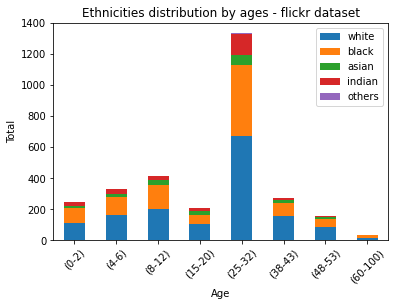

In [28]:
ethnicitiesList = ['white', 'black', 'asian', 'indian', 'others']
ageList=['(0-2)', '(4-6)', '(8-12)', '(15-20)', '(25-32)', '(38-43)', '(48-53)', '(60-100)']

distribution=pd.Series(0, index=ethnicitiesList)
distributionByAge=pd.DataFrame(0, index=ethnicitiesList, columns=ageList)

for indexEth, eth in enumerate(ethnicitiesList):
    group = df.loc[df["ethnicity"] == indexEth]
    distribution[eth] = group.shape[0]
    for indexAge, age in enumerate(ageList):
        distributionByAge[age][eth] = group.loc[group["age"] == indexAge].shape[0]

printPieChart(distribution, ethnicitiesList, "Ethnicities distribution - "+dataset_name+" dataset", save=False)
print(distributionByAge)
printDistribution(distributionByAge, "Ethnicities distribution by ages - "+dataset_name+" dataset", save=False)

    